In [65]:
!pip install opencv-python

In [66]:
!pip install pillow

In [67]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import cv2
import PIL
import os
import pathlib

In [68]:
dataset_url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'

In [69]:
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir = '.', untar=True)

In [70]:
data_path = pathlib.Path(data_dir)
data_path

WindowsPath('datasets/flower_photos')

In [71]:
list(data_path.glob('*/*.jpg'))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [72]:
len(list(data_path.glob('rose/*.jpg')))

0

In [73]:
roses = list(data_path.glob('roses/*.jpg'))

In [74]:
roses[0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [75]:
 len(roses)

641

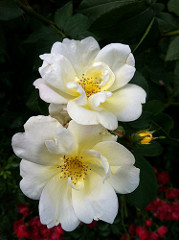

In [76]:
PIL.Image.open(roses[0])

In [77]:
flower_names = {
    'roses':0, 
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips': 4
}

In [78]:
flower_names

{'roses': 0, 'daisy': 1, 'dandelion': 2, 'sunflowers': 3, 'tulips': 4}

In [79]:
flower_image_dict = {
    'roses': list (data_path.glob('roses/*.jpg')),
    'daisy': list (data_path.glob('daisy/*.jpg')),
    'dandelion': list (data_path.glob('dandelion/*.jpg')),
    'sunflowers': list (data_path.glob('sunflowers/*.jpg')),
    'tulips': list (data_path.glob('tulips/*.jpg'))
}

In [80]:
flower_image_dict

{'roses': [WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
  WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
  WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
  WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
  WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
  WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
  WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
  WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
  WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
  WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
  WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
  WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
  WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'),
  WindowsPath('

In [81]:
str(flower_image_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [82]:
img = cv2.imread(str(flower_image_dict['roses'][0]))

In [83]:
img.shape

(240, 179, 3)

In [84]:
cv2.resize(img, (180, 180)).shape

(180, 180, 3)

In [85]:
for i in flower_image_dict:
    print(i, ":", flower_image_dict)

roses : {'roses': [WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'), WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'), WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'), WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'), WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'), WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'), WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'), WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'), WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'), WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'), WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'), WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'), WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'), WindowsPath('datasets/flower_ph

In [86]:
x = []
y = []

In [87]:
for flower_name, images in flower_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized = cv2.resize(img, (180, 180))
        x.append(resized)
        y.append(flower_names[flower_name])

In [88]:
len(x)

3670

In [89]:
len(y)

3670

In [90]:
x

[array([[[ 1, 16,  7],
         [ 1, 16,  7],
         [ 1, 17,  9],
         ...,
         [23, 50, 31],
         [25, 51, 32],
         [26, 52, 33]],
 
        [[10, 23, 15],
         [10, 23, 15],
         [ 9, 22, 14],
         ...,
         [20, 44, 30],
         [23, 47, 33],
         [26, 50, 36]],
 
        [[13, 20, 13],
         [12, 20, 13],
         [11, 19, 12],
         ...,
         [21, 43, 30],
         [22, 45, 31],
         [25, 48, 34]],
 
        ...,
 
        [[12, 24, 18],
         [11, 22, 15],
         [12, 21, 11],
         ...,
         [ 7, 14,  7],
         [ 2,  8,  2],
         [ 0,  2,  0]],
 
        [[19, 30, 28],
         [16, 26, 21],
         [14, 22, 15],
         ...,
         [ 3, 12,  2],
         [ 0,  8,  1],
         [ 0,  6,  1]],
 
        [[11, 21, 20],
         [17, 25, 24],
         [21, 28, 23],
         ...,
         [ 1, 12,  2],
         [ 2, 10,  3],
         [ 3, 10,  4]]], dtype=uint8),
 array([[[13, 18, 17],
         [11, 13, 1

In [91]:
x = np.array(x)
y = np.array(y)

In [92]:
x = x/255

In [93]:
x

array([[[[0.00392157, 0.0627451 , 0.02745098],
         [0.00392157, 0.0627451 , 0.02745098],
         [0.00392157, 0.06666667, 0.03529412],
         ...,
         [0.09019608, 0.19607843, 0.12156863],
         [0.09803922, 0.2       , 0.1254902 ],
         [0.10196078, 0.20392157, 0.12941176]],

        [[0.03921569, 0.09019608, 0.05882353],
         [0.03921569, 0.09019608, 0.05882353],
         [0.03529412, 0.08627451, 0.05490196],
         ...,
         [0.07843137, 0.17254902, 0.11764706],
         [0.09019608, 0.18431373, 0.12941176],
         [0.10196078, 0.19607843, 0.14117647]],

        [[0.05098039, 0.07843137, 0.05098039],
         [0.04705882, 0.07843137, 0.05098039],
         [0.04313725, 0.0745098 , 0.04705882],
         ...,
         [0.08235294, 0.16862745, 0.11764706],
         [0.08627451, 0.17647059, 0.12156863],
         [0.09803922, 0.18823529, 0.13333333]],

        ...,

        [[0.04705882, 0.09411765, 0.07058824],
         [0.04313725, 0.08627451, 0.05882353]

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [96]:
X_train.shape

(2936, 180, 180, 3)

In [97]:
X_test.shape

(734, 180, 180, 3)

In [98]:
cnn = keras.Sequential([
    keras.layers.Conv2D(16, 3, padding='same', activation= 'relu', input_shape=(180, 180, 3)),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(180, 180, 3)),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu', input_shape=(180, 180, 3)),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(5, activation='sigmoid'),
])

In [99]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['Accuracy'])

In [100]:
cnn.fit(X_train, y_train, epochs=2)

Epoch 1/2
92/92 [==============================] - 18s 169ms/step - loss: 1.3049 - Accuracy: 0.4513
Epoch 2/2
92/92 [==============================] - 15s 163ms/step - loss: 0.9722 - Accuracy: 0.6247


In [101]:
cnn.evaluate(X_test, y_test)

23/23 [==============================] - 1s 43ms/step - loss: 0.9634 - Accuracy: 0.6240


[0.9634427428245544, 0.6239781975746155]

In [102]:
import matplotlib.pyplot as plt

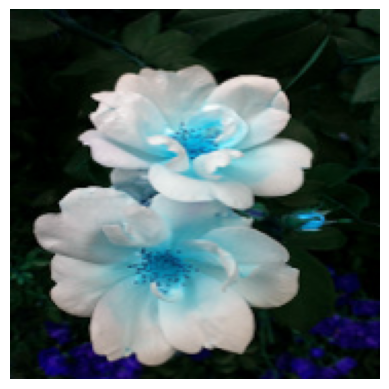

In [103]:
plt.imshow(x[0])
plt.axis('off')
plt.show()

In [109]:
data_augumentation = keras.layers.experimental.preprocessing.RandomZoom(0.10)

In [110]:
#data_augumentation(x)[0]

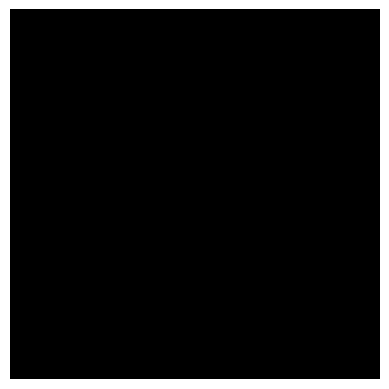

In [111]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype('uint8'))
plt.show()

In [113]:
data_augumentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip('horizontal', input_shape=(180, 180, 3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1)
])

In [114]:
cnn = keras.Sequential([
    data_augumentation,
    keras.layers.Conv2D(16, 3, padding='same', activation= 'relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(5, activation='sigmoid'),
])

In [115]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['Accuracy'])

In [116]:
cnn.fit(X_train, y_train, epochs=2)

Epoch 1/2
92/92 [==============================] - 22s 199ms/step - loss: 1.2940 - Accuracy: 0.4401
Epoch 2/2
92/92 [==============================] - 18s 199ms/step - loss: 1.0308 - Accuracy: 0.5906
